In [121]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [122]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [123]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [124]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

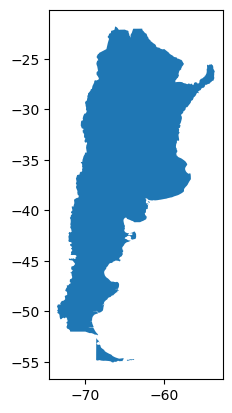

In [125]:
argentina=countries[countries.COUNTRY=='Argentina']

argentina.plot()


<Axes: >

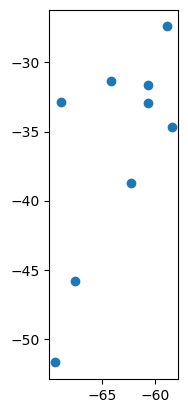

In [126]:
ciudades_argentina=cities[cities.COUNTRY=='Argentina']

ciudades_argentina.plot()

<Axes: >

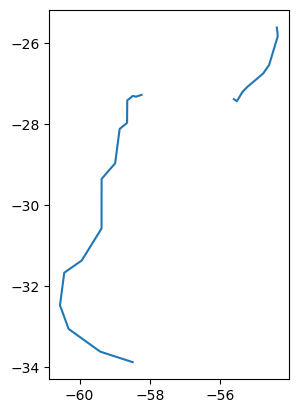

In [142]:
rios_argentina=gpd.clip(gdf=rivers, mask=argentina)

rios_argentina.plot()

In [143]:
argentina_coordenada=[-34.61315, -58.37723]

In [144]:
argentina.to_crs(22171).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

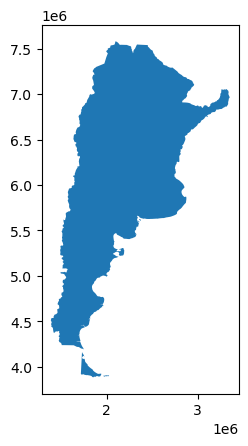

In [145]:
argentina.to_crs(22171).plot()

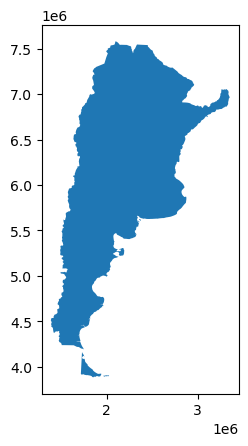

In [146]:
mapabase22171=argentina.to_crs(22171).plot()

#alemania.to_crs(4839).centroid.plot(color='pink',ax=mapabase4839)

<Axes: >

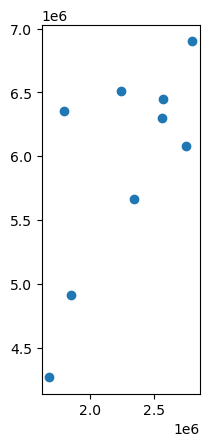

In [147]:
argentina22171=argentina.to_crs(22171)
ciudades_argentina=cities[cities.COUNTRY=='Argentina']
ciudades22171=ciudades_argentina.to_crs(argentina22171.crs)#que estas ciudaes se representen dentro del mapa como coordenadas

ciudades22171.plot()

<Axes: >

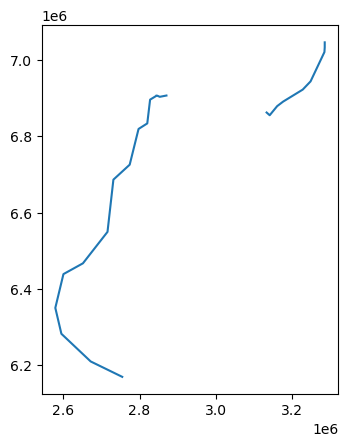

In [148]:
rios22171=rivers.to_crs(argentina22171.crs)
rios22171=gpd.clip(gdf=rios22171, mask=argentina22171)

rios22171.plot()

<Axes: >

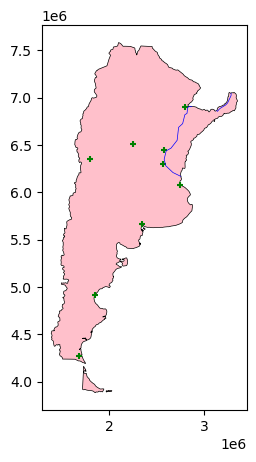

In [149]:
mapabase=argentina22171.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
ciudades22171.plot(marker='+',color='green', markersize=16,ax=mapabase)
rios22171.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

In [150]:
argentina_coordenada=[-34.61315, -58.37723]

In [151]:
import folium
m=ciudades22171.explore(location=argentina_coordenada,zoom_start=5,tiles='cartoDB positron',color='pink', name="cities")

m=rios22171.explore(m=m,color='blue',name="rivers")

folium.LayerControl().add_to(m)

m

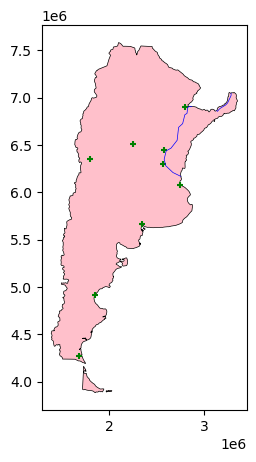

In [152]:
import matplotlib.pyplot as plt

mapabase=argentina22171.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
mapa2=ciudades22171.plot(marker='+',color='green', markersize=16,ax=mapabase)
mapa3=rios22171.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

plt.savefig(os.path.join("figures",'mapa3.jpg'))

In [153]:
# conversion
argentina_border=argentina.boundary.to_frame() 

# new column (optional)
argentina_border['name']='Argentina' 

# renaming the geometry column
argentina_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
argentina_border = argentina_border.set_geometry("geometry")

# verifying:
argentina_border.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [154]:
argentina_states=gpd.read_file(os.path.join("maps","arg_adm_unhcr2017_SHP","arg_admbnda_adm1_unhcr2017.shp"))
argentina_municipalities=gpd.read_file(os.path.join("maps","arg_adm_unhcr2017_SHP","arg_admbnda_adm2_unhcr2017.shp"))

In [155]:
argentina_states=argentina_states.to_crs(22171)
argentina_municipalities=argentina_municipalities.to_crs(22171)

In [156]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [157]:
worldMaps='https://github.com/Romina300/simpleplot/raw/main/maps/worldMaps.gpkg'

In [158]:
#from  fiona import listlayers

#listlayers(worldMaps)

In [159]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [160]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","ar-airports.csv"))

# see

infoairports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5781,SAEZ,large_airport,Minister Pistarini International Airport,-34.8222,-58.5358,67,SA,Argentina,AR,...,Buenos Aires (Ezeiza),1,SAEZ,EZE,EZE,http://www.aa2000.com.ar/index.php,https://en.wikipedia.org/wiki/Ministro_Pistari...,"BUE, Ezeiza",1275,2022-10-27T15:05:29+00:00
2,5771,SABE,large_airport,Jorge Newbery Airpark,-34.5592,-58.4156,18,SA,Argentina,AR,...,Buenos Aires,1,SABE,AEP,AER,NaN,https://en.wikipedia.org/wiki/Aeroparque_Jorge...,NaN,1050,2021-10-07T15:55:36+00:00
3,5835,SAWH,medium_airport,Malvinas Argentinas Airport,-54.8433,-68.2958,102,SA,Argentina,AR,...,Ushuaia,1,SAWH,USH,USU,NaN,https://en.wikipedia.org/wiki/Ushuaia_Internat...,NaN,750,2021-10-07T11:21:29+00:00
4,5831,SAWC,medium_airport,El Calafate - Commander Armando Tola Internati...,-50.2803,-72.053101,669,SA,Argentina,AR,...,El Calafate,1,SAWC,FTE,ECA,http://www.aeropuertoelcalafate.com/en/,https://en.wikipedia.org/wiki/Comandante_Arman...,NaN,500,2022-01-12T18:23:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,333824,AR-0654,closed,Agrodistribuidora Airstrip,-29.220089,-61.760298,220,SA,Argentina,AR,...,Tostado,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2020-04-12T12:30:36+00:00
938,42893,AR-0471,heliport,Dayry Partners Americas Manufacturing Argentin...,-32.44,-63.2289,639,SA,Argentina,AR,...,Villa Nueva,0,NaN,NaN,HNE,NaN,NaN,NaN,0,2009-10-20T11:13:21+00:00
939,333815,AR-0652,closed,Villa Unión Airport,-29.42218,-62.789526,248,SA,Argentina,AR,...,Villa Unión,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2020-04-10T04:01:54+00:00
940,42903,AR-0481,heliport,Roca Heliport,-32.06,-64.7794,3444,SA,Argentina,AR,...,Yacanto de Calamuchita,0,NaN,NaN,HYC,NaN,NaN,NaN,0,2009-10-20T11:13:21+00:00


In [195]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           938 non-null    object 
 1   type           938 non-null    object 
 2   latitude_deg   938 non-null    float64
 3   longitude_deg  938 non-null    float64
 4   elevation_ft   904 non-null    float64
 5   region_name    938 non-null    object 
 6   municipality   923 non-null    object 
dtypes: float64(3), object(4)
memory usage: 51.4+ KB


In [196]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           938 non-null    object 
 1   type           938 non-null    object 
 2   latitude_deg   938 non-null    float64
 3   longitude_deg  938 non-null    float64
 4   elevation_ft   904 non-null    float64
 5   region_name    938 non-null    object 
 6   municipality   923 non-null    object 
dtypes: float64(3), object(4)
memory usage: 51.4+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

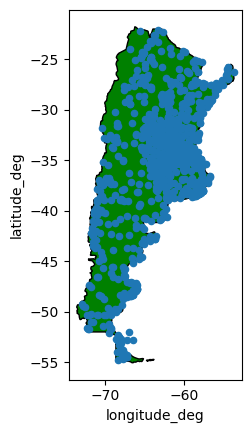

In [197]:
# let's plot

base = argentina.plot(color='green', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [198]:
argentina_airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected
#simepre q alg diga longitud latitud es q est a no protyecatdi
#e 5341 es la proyeccion del mapa de brasil

In [199]:
argentina_airports=airports.to_crs(22171)

<Axes: >

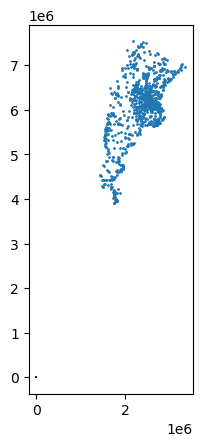

In [200]:
# let's plot

base = argentina.plot(color='pink', edgecolor='black')
airports.plot(ax=base,markersize=1)

In [201]:
import os

argentina22171.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='country', driver="GPKG")
ciudades22171.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='cities', driver="GPKG")
rios22171.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='rivers', driver="GPKG")
argentina_states.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='states', driver="GPKG")
argentina_municipalities.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='municipalities', driver="GPKG")
argentina_border.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='border', driver="GPKG")
argentina_airports.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='airports', driver="GPKG")

In [202]:
link_argentinaMaps22171='https://github.com/Romina300/simpleplot/raw/main/maps/argentina22171/argentinaMaps22171.gpkg'

In [203]:
from  fiona import listlayers

listlayers(link_argentinaMaps22171)

['country', 'cities', 'rivers']

In [ ]:
#countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
#cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
#rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")